In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
exams = pd.read_csv("exams.csv")
keys = pd.read_csv("keys.csv")

In [76]:
exams

,exam,total_points
0,08-fall-mid,100
1,09-fall-mid,120
2,09-spring-mid,100
3,10-spring-final,100
4,11-fall-final,100
5,11-fall-mid,110
6,11-spring-mid,80
7,12-spring-mid,150
8,13-fall-mid,160
9,18-spring-final,79


In [71]:
exams.loc[13] = ['overall', exams['total_points'].sum()]

In [4]:
keys

,character,category
0,c,Code
1,d,Drawing/Chart
2,m,Math
3,q,Multiple Choice
4,s,Short Answer


In [ ]:
#cols: gpt3.5_overall, gpt3.5_math, etc..

In [27]:
#gpt performance
columns = keys['category'].tolist()
columns.append('overall')
gpt35_df = pd.DataFrame(columns = columns)

In [28]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall


In [29]:

for i in range(len(exams.index)):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt3.5_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
    
    gpt35_df.loc[len(gpt35_df.index)] = l
#         print(tmp)
    

08-fall-mid
09-fall-mid
09-spring-mid
10-spring-final
11-fall-final
11-fall-mid
11-spring-mid
12-spring-mid
13-fall-mid
18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [30]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.698500,0.715000,0.385000,NaN,NaN,0.685000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.685714,0.550000
6,NaN,NaN,NaN,NaN,NaN,0.325000
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [31]:
bard_df = pd.DataFrame(columns = columns)

In [32]:
for i in range(len(exams.index)):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['bard_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['bard_pts_earned'].sum()/exams.iat[i,1])
    
    bard_df.loc[len(bard_df.index)] = l

08-fall-mid
09-fall-mid
09-spring-mid
10-spring-final
11-fall-final
11-fall-mid
11-spring-mid
12-spring-mid
13-fall-mid
18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [96]:
bard_df


,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.260000,0.360000,0.300000,NaN,0.240000,0.285000
1,0.600000,0.433333,0.516667,NaN,0.520000,0.533333
2,0.200000,NaN,0.325000,NaN,0.266667,0.300000
3,NaN,0.660000,0.495000,NaN,NaN,0.620000
4,NaN,NaN,0.330000,NaN,NaN,0.330000
5,NaN,NaN,0.373200,NaN,NaN,0.605273
6,NaN,0.318750,0.271250,NaN,NaN,0.318750
7,1.000000,NaN,0.100000,NaN,0.703571,0.663333
8,0.590000,0.200000,0.350000,NaN,0.519231,0.515625
9,0.818182,0.482759,0.333333,0.455696,NaN,0.455696


In [95]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.698500,0.715000,0.385000,NaN,NaN,0.685000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.685714,0.550000
6,NaN,NaN,NaN,NaN,NaN,0.325000
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [36]:
gpt35_df.to_csv('gpt35_scores.csv', index = False)
bard_df.to_csv('bard_scores.csv', index = False)

In [52]:
l = []
for col in gpt35_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(gpt35_df[col][i]):
            curr_topic += gpt35_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt35_df.loc[len(gpt35_df.index)] = l

In [54]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.698500,0.715000,0.385000,NaN,NaN,0.685000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.685714,0.550000
6,NaN,NaN,NaN,NaN,NaN,0.325000
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [57]:
l = []
for col in bard_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(bard_df[col][i]):
            curr_topic += bard_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
bard_df.loc[len(bard_df.index)] = l

In [58]:
bard_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.260000,0.360000,0.300000,NaN,0.240000,0.285000
1,0.600000,0.433333,0.516667,NaN,0.520000,0.533333
2,0.200000,NaN,0.325000,NaN,0.266667,0.300000
3,NaN,0.660000,0.495000,NaN,NaN,0.620000
4,NaN,NaN,0.330000,NaN,NaN,0.330000
5,NaN,NaN,0.373200,NaN,NaN,0.605273
6,NaN,0.318750,0.271250,NaN,NaN,0.318750
7,1.000000,NaN,0.100000,NaN,0.703571,0.663333
8,0.590000,0.200000,0.350000,NaN,0.519231,0.515625
9,0.818182,0.482759,0.333333,0.455696,NaN,0.455696


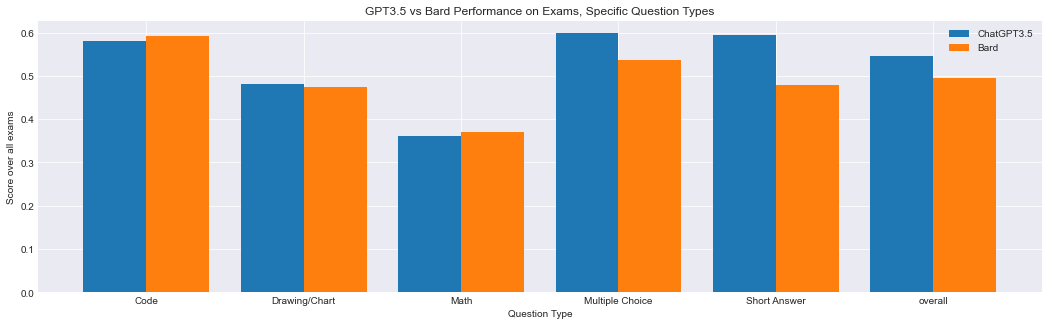

In [67]:
xax = np.arange(len(bard_df.loc[13].tolist()))
gpt = gpt35_df.loc[13]
b = bard_df.loc[13]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax - 0.2, gpt, 0.4, label = 'ChatGPT3.5')
plt.bar(xax + 0.2, b, 0.4, label = 'Bard')

plt.xticks(xax, bard_df.columns)
plt.xlabel("Question Type")
plt.ylabel("Score over all exams")
plt.title("GPT3.5 vs Bard Performance on Exams, Specific Question Types")

plt.legend()
plt.show()

In [ ]:
xax = np.arange(len(bard_df.loc[13].tolist()))
gpt = gpt35_df.loc[13]
b = bard_df.loc[13]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax - 0.2, gpt, 0.4, label = 'ChatGPT3.5')
plt.bar(xax + 0.2, b, 0.4, label = 'Bard')

plt.xticks(xax, bard_df.columns)
plt.xlabel("Question Type")
plt.ylabel("Score over all exams")
plt.title("GPT3.5 vs Bard Performance on Exams, Specific Question Types")

plt.legend()
plt.show()

In [91]:
bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist()

['Code', 'Drawing/Chart', 'Math', 'Short Answer', 'overall']

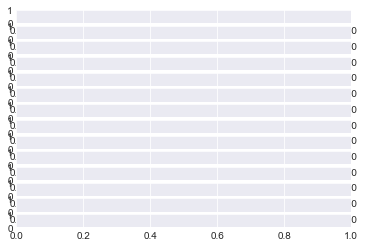

In [78]:
fig, axs = plt.subplots(14,1)

In [94]:
for i in range(14):
    ax = axs[i]
    
    xax = np.arange(len(bard_df.loc[i][~np.isnan(bard_df.loc[i])].tolist()))
    print(xax)
    gpt = gpt35_df.loc[i][~np.isnan(gpt35_df.loc[i])]
    b = bard_df.loc[i][~np.isnan(bard_df.loc[i])]
#     ax.figure(figsize=(18, 5))
#     ax.style.use('seaborn-darkgrid')
    ax.bar(xax - 0.2, gpt, 0.4, label = 'ChatGPT3.5')
    ax.bar(xax + 0.2, b, 0.4, label = 'Bard')

    ax.set_xticks(xax, bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist())
    ax.set_xlabel("Question Type")
    ax.set_ylabel("Score over all exams")
    ax.set_title("GPT3.5 vs Bard Performance on Exams, Specific Question Types")

[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3]


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).